# Introducción a Física de Partículas


## Boletín de problemas III


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Noviembre 2021


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Fri Nov  8 17:11:38 2024


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.constants as units

## Detectores

-----

**ejercicio 1**

Para medir la sección eficaz de la interacción $\pi^+ + p$ realizamos el siguiente experimento, enviamos un haz de $\pi^+$ de 20 GeV de energía a un tanque de longitud $L = 1$ m, que en una primera configuración está vacío y luego lleno de hidrógeno líquido, y medimos los flujos tras el tanque normalizados al mismo flujo incidente y obtenemos $N_0 = 7.5 \times 10^5$ y $N_H = 6.9 \times 10^5$ respectivamente. Calcula la sección eficaz y su error estadístico. Datos: $\rho_H = 60$ $\mathrm{kg/cm}^3$ 


*solución*

La atenuación será:

$$
N_H = N_0 e^{-n \sigma L} \simeq N_0 (1 - n \sigma L)
$$


donde $n = N_A \rho_H/M_H$, $N_A$ el número de Avogadro, y $M_H$ la masa molar del Hidrógeno. 

luego:

$$
\sigma = \frac{(N_0 - N_H)}{L} \frac{M_H}{N_A \rho_H}
$$


El error estará asociado al error en el número de eventos que viene dado por $\sqrt{N_0 - N_H}$

In [23]:
N0  = 7.5e5
NH  = 6.9e5
NA  = units.N_A
L   = 100 # cm
rho = 60e3 # g/cm3
MH  = 2.015 #g/mol

sigma = ((N0 - NH)/L) * (MH/(NA*rho)) # cm2
print('sigma {:1.2e} b'.format(sigma * 1e24))
usigma = (np.sqrt(N0 - NH)/L) * (MH/(NA*rho)) # cm2
print('error estadístico {:1.2e} b'.format(usigma * 1e24))


sigma 3.35e-02 b
error estadístico 1.37e-04 b


------

**ejercicio**

Sea un $\nu$ de 1 MeV y la sección eficaz de interacción neutrino $\sigma \simeq $ ¿Qué longitud deben recorrer los neutrinos en promedio para sufrir una interacción?

-----

**ejercicio**

Los muones de alta energía pierden energía atravesando la materia según:

$$
\frac{1}{\rho} \frac{\mathrm{d}E}{\mathrm{d}x} \simeq a + b \,E 
$$

donde $a \simeq 2.5 \; \mathrm{MeV \, cm^2 /g}$ está asociado a la pérdida por ionización y $b \simeq 3.5 \times 10^{-6} \, \mathrm{cm^2/g}$ a Bremsstrahlung para el caso de tratarse de roca. Considerar $A = 22, \; Z=11$ y $\rho = 2.65 \; \mathrm{g/cm^3}$.

¿A qué energía la pérdida de energía por ionización es igual a la de Bremsstrahlung? ¿Cuanta distancia recorre en promedio un muon cósmico de 100 GeV en roca?

*solución*

La energía a la que son comparables es: $ a = b E \to E  = a/b$

La pérdida de energía por distancia de un muón de $E = 100$ en la roca es:

$$
\frac{\mathrm{d}E}{\mathrm{d}x} \simeq (a + b \,E) \rho
$$

Luego la distancia hasta que se detenga considerando la pérdida siempre similar

$$
\mathrm{d}x = \frac{\mathrm{dE}}{(a + b E) \rho}
$$

$$
L = \frac{1}{\rho b} \ln{\frac{a + b E}{a}}
$$

In [35]:
a = 2.5 # MeV cm2/g
b = 3.5e-6 # cm2/g

print("Energy {:1.2f} GeV".format((a/b) * 1.e-3))

Energy 714.29 GeV


In [41]:
Emu = 100e3 # MeV
rho = 2.65 # g/cm3
dEdx = (a + b * Emu) * rho # MeV/cm
print('dE/dx {:1.2f} MeV/cm'.format(dEdx))
L = (np.log((a + b * Emu)/a))/(rho*b)
print('length {:1.2f} m'.format(L * 1e-2))

dE/dx 7.55 MeV/cm
length 141.27 m


----

**ejercicio 2**

Considera dos partículas de masas $m_1, m_2$ con el mismo momento $p$, si situamos dos detectores de centelleo a una distancia $L$ que las partículas atriesan perpendicularmente, ¿Cuál es la diferencia temporal entre la llegada de las dos partículas al segundo centelleador? Si la resolución temporal de los centelleadores es de 300 ps, ¿A qué distancia deben estar situados los centelleadores para separar $\pi$ de $K$ de 4 GeV de momento a 3 desviaciones estándar?

*solución*

La velocidad de una partícula es:

$$
\beta = \frac{p}{E} = \frac{p}{\sqrt{p^2 +m^2}} = \frac{1}{\sqrt{1+(m/p)^2}}  \simeq1 - \frac{m^2}{2p^2}
$$

La diferencia del tiempo de llegada al segundo centelleador es:

$$
\Delta t = L \frac{m^2_2 - m^2_1}{p^2}
$$

Y para separar las dos partículas si la resolución es $\sigma$, exigimos $\Delta t \gt 3 \sigma$

In [11]:
m_pi = 0.139 # GeV
m_K  = 0.493 # GeV
pp   = 4     # GeV
sigma = 300e-12 # s
nn   = 3 # number of sigmas
cc   = 3e8 # m/s

L = 2 * nn * sigma * cc * (pp**2)/(m_K**2 - m_pi**2)
print('distance L ', L)


distance L  38.61832224844454


----

**ejercicio**

Considera un espectrométro de longitud $L$ y campo magnético $B$ y tres cámaras de detección situadas antes, en el medio y después del espectrómetro, que nos permiten estimar la sagitta $s = x_2 - (x_3+x_1)/2$, calcula el momento transverso de la partícula y su incertidumbre si la resolución de cada cámara es $\sigma_x$. Considerar $\theta$ pequeño.

<img src="./imgs/prob_sagitta.png" width = 200 align = "center">


*solución*

La relación entre el momento transverso, $p_T$ (GeV), el campo magnético $B$ (T) y el radio de curvatura es $\rho$ (m)

$$
p_T = 0.3 B \rho
$$

por otro lado la relación entre la sagitta y su ángulo, si $\theta$ pequeño:

$$
s = R (1- \cos \theta/2) \simeq \frac{R \theta^2}{8}, \;\;\; L = 2 R \sin \theta/2 \simeq R \theta
$$

luego

$$
s = R \frac{L^2}{8R = ^2} = \frac{L^2}{8} = 0.3 \frac{BL^2}{8 p_t}
$$

esto es:

$$
p_T = 0.3 \frac{BL^2}{8s}
$$


La resolución en $p_T$

$$
\sigma_{p_T} = p_T \frac{\sigma_s}{s} \to \frac{\sigma_{p_T}}{p_T} = \frac{\sigma_s}{s}
$$

y la incertidumbre en la sagitta:

$$
s = \sqrt{3} \sigma_x
$$

luego:

$$
\sigma_{p_T} = 0.3 \frac{BL^2}{8s^2} \sqrt{3} \sigma_x

-----

**ejercicio**

Considera un detector de trazas construidos por dos capas cilíndricas de detectores de silicio situadas a unos radios de $r_1, r_2$ y cuyos ejes van en la dirección $z$, sea la resolución en $x$ e $y$ de $\sigma_0$ en las dos capas. Considera que la trayectoria no se curva en la región de este detector. Estima la resolución del parámetro de impacto en el plano transverso. Decimos que el parámetro de impacto es la distancia de la extrapolación de la traza al vértice primaro (con coordenadas $(x_v, y_v, z_v)$.  Esta resolución es fundamental para identificar las partículas que no provienen del vértice primaro. 


Pero antes de que la traza lleve al detector debe atravesar el material del tuvo central que introduce un error en el ángulo, (que se donomina de *multiple scattering*) y que podemos parametrizar por $\theta_0 = k(x/X_0)/p$, donde $k(x/X_0)$ depende de la distancia y del material que atraviesa la partícula. Muestra la dependencia de la resolución con el momento transverso. ¿Qué resolución tienen las trazas de alto momento transverso comparadas con las de bajo?



-------

**ejercicio 3**

Delphi disponía de 3 capas cilíndricas de detectores de silicio situadas en el eje de interacción. Si la la distancia entre ellas era de , y la resolución de los detectores es de 8 $\mu\mathrm{m}$ ¿Cuál es la resolición que se obtenía al calcular el parámetro de impacto?



----

**ejercicio**

Estimar la resolución espacial necesaria de las cámaras de muones para que podamos separa $\mu$ y $\mu^+$ de 1 TeV en un campo magnético de 1 T, si la separación entre la primera cámara y la segunda es de 5 m.


Estimate the space resolution needed to discriminate the charge of 1 TeV muons with
3 detector layers in a B=1 T magnetic  eld with an overall lever arm of 5 m.

Estimar la resolución espacial de detectores de muones separados entre ellos 5 m para que en un campo magnético de 1 Tesla puedan separar $\mu$ de $\mu^+$ de 

## Problemas varios



## Problemas M.Tompson

1.1) Indica si son posibles los siguientes vértices:

| |
| :--: |
| <img src="./imgs/prob_feynman_e1.png" width = 500 align="center"> |
| Indentfica los vértices [MT1.P1]|


1.2)  Dibuja los diagramas árbol de las posibles interacciones, e indica si son aniquilaciones o dispersiones: 


  * a) $e+e\to e+e$
  
  * b)  $e+e^+ \to \mu + \mu^+$
  
  * c) $e + e^+ \to e + e^+$


[mixture] Completa las siguientes desintegraciones añadiendo los neutrinos y antinuetrinos necesarios y dibuja los diagramas de Feynman: 

   * a) $\tau \to e + \nu s$,
   * b) $\mu^+ \to e^+ + \nu s$, 
   * c) $\tau^+ \to \mu^+ + \nu s$

[mixture] Indica los posible mediadores entre las siguientes interacciones y dibuja los diagramas de Feynman correspondientes: 

   * a) $\nu_e + e \to \nu_e + e$ 
   * b) $\bar{\nu}_e + e \to \bar{\nu}_e + e$

[mixture] Dibuja los diagramas de Feynman de las desintegraciones:

   * a) $\pi^+ \to \mu^+ + \nu_\mu$, donde $\pi^+$ es un mesón $(u \bar{d})$
   * b) $\Lambda \to p + e + \bar{\nu}_e$, donde $\Lambda$ es un barión $(uds)$.
   

[mixture] Calcula la energía y momento de las partículas finales en el CM en la desintegración. Calcula también la $\beta$ de los leptones cargados:

   * a) $\pi^+ \to \mu^+ + \nu_\mu$ 
   * b) $\pi^+ \to e^+ + \nu_e$.


## Soluciones M.T

### Ejercicio MT 1.1) 

Indica si son posibles los siguientes vértices:

| |
| :--: |
| <img src="./imgs/prob_feynman_e1.png" width = 500 align="center"> |
| Indentfica los vértices [MT1.P1]|



a) $e,e,\gamma$, Sí, el fotón se acopla al $e$,

b) $\nu_e, \nu_e, \gamma$. No. Los neutrinos solo interaccionan débilmente, esto es con el $W$ o el $Z$

c) $e, e^+, \gamma$. No. Excepto el $W$, el resto de bosones se acoplan entre partículas del mismo sabor, y aquí se acopla un electrón con un positrón. El acoplo permitido es $f, f, V$, siendo $f$ el fermión y $V$ el bosón vectorial $\gamma, Z,$ o gluón.

d) $\nu_e, \nu_e, Z$. Sí. El neutrino se acopla con el $Z$

e) $e, \mu, \gamma$. No. De nuevo las partículas del acoplo deben tener el mismo sabor si se acoplan con el $\gamma$ y aquí cambia de $e$ a $\mu$.

f) $e, \nu_e, W$. Sí. El $W$ cambia el sabor entre leptones de la misma generación, en este caso $e, \nu_e$.

g) $e, \tau, Z$. No, de nuevo la partículas deben tener el mismo sabor si se acoplan al $Z$. 

h) $e, \nu_\mu, W$. No porque el $W$ acopla las parejas de la misma generación y $e, \nu_\mu$ son de generaciones deferentes.

### Ejercicio MT 1.2)

1.2)  Dibuja los diagramas árbol de las posibles interacciones, e indica si son aniquilaciones o dispersiones: 

  * a) $e+e\to e+e$
  
  * b)  $e+e^+ \to \mu + \mu^+$
  
  * c) $e + e^+ \to e + e^+$


a) Dispersión

b) Aniquilación

c) dispersion y aniquilación (los dos son posibles)

| |
| :--: |
| <img src="./imgs/prob_feynman_e2.png" width = 300 align="center"> |
| a) arriba-izda, b) arriba-derecha, c) abajo [MT1.P2]|


### Ejercicio [mixture] 

Completa las siguientes desintegraciones añadiendo los neutrinos y antinuetrinos necesarios y dibuja los diagramas de Feynman: 

   * a) $\tau \to e + \nu s$,
   * b) $\mu^+ \to e^+ + \nu s$, 
   * c) $\tau^+ \to \mu^+ + \nu s$


a) $\tau \to e + \nu_\tau + \bar{\nu}_e$

b) $\mu^+ \to e^+ + \bar{\nu}_\mu + \nu_e$

c) $\tau^+ \to \mu^+ + \nu_\mu + \bar{\nu}_\tau$

| |
| :--: |
| <img src="./imgs/prob_feynman_e3.png" width = 300 align="center"> |
| a) arriba-izda, b) arriba-dereca, c) abajo|


### Ejercicio [mixture] 

Indica los posible mediadores entre las siguientes interacciones y dibuja los diagramas de Feynman correspondientes: 

   * a) $\nu_e + e \to \nu_e + e$ 
   * b) $\bar{\nu}_e + e \to \bar{\nu}_e + e$

a) Dispersion via Z y también via W

b) dispersión via Z, aniquiliación via un W

| |
| :--: |
| <img src="./imgs/prob_feynman_e4.png" width = 300 align="center"> |
| a) arriba, b) abajo|

### Ejercicio [mixture] 


Dibuja los diagramas de Feynman de las desintegraciones:

   * a) $\pi^+ \to \mu^+ + \nu_\mu$, donde $\pi^+$ es un mesón $(u \bar{d})$
   * b) $\Lambda \to p + e + \bar{\nu}_e$, donde $\Lambda$ es un barión $(uds)$.

| |
| :--: |
| <img src="./imgs/prob_feynman_e5.png" width = 300 align="center"> |
| a) izda, b) dereca|

### Problems A. Bettini (2nd edition)

2.1) Calcula la energía y momento de las partículas finales en el CM en la desintegración. Calcula también la $\beta$ de los leptones cargados:

   * a) $\pi^+ \to \mu^+ + \nu_\mu$ 
   * b) $\pi^+ \to e^+ + \nu_e$.

2.2) Considera la desintegración $K^- \to \mu + \bar{\nu}_\mu$. Calcula la energía y momento en el CM del $\nu, \bar{\nu}_\mu$ y el máximo momento del $\mu$ si el $K^-$ tienen un momento de 5 GeV.

2.14) Calcula la energía de umbral del $\nu$ para producir los procesos: $\nu_e + n \to e + p$, $\nu_\mu + n \to \mu^- + p$, $\nu_\tau + n \to \tau + p$.

[Reines.Cowen] (pag 74)

[Mixture] Indica si los siguientes procesos están permitidos y si no, por qué [SOL]

a) $\pi^+ \to \mu^+ + \nu_{\mu}$

b) $\pi^+ \to \mu^+ + \bar{\nu}_\mu$

c) $n \to p + e$

d) $e \to \nu_e + \gamma$

e) $p \to e^+ + \bar{\nu}_e$

f) $p \to n + e + \bar{\nu}_e$

h) $n \to p + e + \nu_e$

3.8) Indica si son posibles los procesos [SOL]:

   a) $p \to n + e^+$

   b) $\mu^+ \to \nu_\mu + e^+$

   c) $e^+ + e \to \nu_\mu + \bar{\nu}_\mu$

   d) $\nu_\mu + p \to \mu^+ + p$

   e) $\nu_\mu + n \to \nu + p$

   f) $\nu_\mu + n \to e^- + p$

   g) $e^+ + n \to p + \nu_e$

   h) $e + p \to n + \bar{\nu}_e$

71) 7.2) Dibuja los diagramas de Feynman para: $\pi^+ \to e^+ \nu_e$, $\Lambda \to p + e + \bar{\nu}_e$

7.3) Da la Constante de Fermi en el SI, $G_F = 1.16 \times 10^{-5}$ GeV$^{-2}$. [SOL]

7.4) El colisionador PEP de SLAC $e+e^+ \to \tau + \tau^+$ a una energía $\sqrt{s} = 29$ GeV, calcular la distancia media que recorre el $\tau$. [SOL]

7.5) Considerar $\mu^+ \to e^+ + \nu_e + \bar{\nu}_\mu$ y $\tau^+ \to e^+ + \nu_e + \bar{\nu}_\tau$, la razón de desintegración el primero es $\mathcal{B} = 100$ % y del segundo 17 %. Si la vida media del muón $\tau_\mu = 2.2$ $\mu$s, calcula la vida media del tau $\tau_\tau$. [SOL]



7.7) ¿Cuál es la diferencia entre un neutrino y su anti-neutrino? ¿Qué cantidades se conservan en las dispersiones de neutrinos? Completa la dispersión y dibuja el diagrama de Feynman asoaciado: $\nu_\mu + e \to \mu + ...$ Si los neutrinos no tienen masa ¿Cuál es la dirección de su espín? ¿Y para los anti-neutrinos?. Si el Universo contiene neutrinos a 2K de temperatura, ¿cuál es la velocidad de los neutrinos? [SOL]

7.8) [modificada] Exite las desintegraciones $\mu^+ \to e^+ + \gamma, \; \mu^+ \to e^+ + e^+ + e$ ¿Por qué? [SOL]

7.12) ¿Cuál es la energía mínima y máxima del electrón en la desintegración de un $\mu$ en reposo?

7.13) Los rayos cósmicos son principalmente protones. Su espectro de energía decrece con la energía. En las interacciones con los núcleos de la atmósfera producen mesones, que a su vez, al desintegrarse producen $\nu_\mu, \nu_e$. Aproximadamente a 1 GeV se procuden $N = 10^6$ $\nu_\mu$, ¿Cuántos de ellos interaccionan al atravesar el diámetro de la Tierra? Considear $sigma = 7$ fbarn, $\rho = 5 \, 10^3$ kg m$^{-3}$ y el radio $R= 6000$ km. [SOL]

7.15) Dibuja los diagramas de Feynman para la dispersión $\bar{\nu}_e + e$ y para $\nu_e + e$.

7.16) El experimento GALLEX del Laboratorio Nacional de Gran Sasso (LNGS) en Itialia, medió el flujo de $\nu_e$ del Sol a partir de la reacción $\nu_e + ^{71}\mathrm{Ga} \to ^{Ge}\mathrm{Ge} + e$ que tiene un umbral de energía $E = 233$ keV. El flujo de nuetrinos del sol es $\phi = 6 \, 10^{14}$ m$^{-2}$s$^{-1}$. Consideremos que la sección eficaz es $\sigma = 10^{-48}$ m$^2$. Si consideramos una efficiencia de selección del 40%, ¿Cuántos nucleos de $^{71}$Ga son necesarios para tener una interacción al día? Si la abundancia natural del $^{71}$Ga es 40%, ¿Cuánta masa se necesita de galio? [SOL]

7.17) ¿Cuántos metros de Fe se precisan para que un $\nu_\mu$ de 1 GeV interaccione en promedio una vez? Compara la distancia con el diámetro de la Tierra. Considera $\sigma = 0.017$ fb, $\rho = 7.7 \, 10^{3}$ kg m$^{-3}$, Z= 26, A = 56. [SOL-TODO:check]

7.26) Un pión de momento 500 MeV decay en $\pi^- \to \mu + \bar{\nu}$. Da el valor mínimo y máximo del momento del muón. Indica el sabor el la quiralidad del neutrino.

7.27) Considera un tanque de agua para detector neutrinos solares por efector Cherenkov (como SuperKamiokande) mediante la interacción $\nu_e + e \to \nu_e + e$. Si la sección eficaz es $\sigma = 10^{-47}$ m$^2$, y el flujo incidente por encima de la energía umbral $\Phi = 10^{10}$ m$^{-2}$s$^{-2}$, ¿Cuál es la masa necesaria para tener una razón de intracción de 10  eventos al día con una efficiencia de detección de 50%? [SOL]


#### Bettini 1st edition

1) [AB1.7.P3] Reescribe la constante de Fermi en el SI

2) [AB1.7.P1] Dibuja los diagramas de Feynman de las desintegraciones: $K^{*+} \to K^0 + \pi^+$, $n \to p + e + \bar{\nu}_e$, $\pi^+ \to \mu^+ + \nu_\mu$

3) [AB1.7.P7] ¿Cuáles son las diferencias entre neutrinos y antineutrinos? Completa la interacción: $\nu_\mu + e \to \mu  + ?$. El Universo este lleno de neutrinos con temperatura $2$ K, si los neutrinos tienen una masa de 50 meV, ¿Cuál es su velocidad?

4) [AB1.7.P8] Escribe las corrientes cargadas de $\nu_\mu$ con protón y nucleón para producir un pión. Existen las desintegraciones $\mu^+ \to e^+ + \gamma$, $\mu^+ \to e + e^+ + e^+$

5) [AB1.7.P13] Si en las interacciones de los rayos cósmicos (principalmente protones) con la atmósfera se producen $N_\nu = 10^6$ neutrinos a 1 GeV, considera cuántos interaccionan si atraviesan el diámetro de Tierra dada la sección eficaz 7 fb, la densidad de la tierra $\rho = 5 \, 10^3$ kg/m$^3$ y el radio $R = 6000$ km.

6) [AB1.7.PX] El experimento GALLEX del Laboratorio del Gran Sasso, Italia, medía la interacción de los $\nu_e$ solares con $^{71}$Ga, $\nu_e + ^{71}\mathrm{Ga} \to ^{71}\mathrm{Ge} + e$, que tiene una en energía umbral $E_0 = 233$ keV.
La predicción flujo solar es $\phi = 6 \, 10^{14}$ m$^{-2}$s$^{-1}$ y la sección eficaz $\sigma = 10^{-48}$ m$^2$. Si la eficiencia de detección, $\epsilon$ es del 40 % y la abundancia, $\eta$ del isótopo $^{71}$Ga en is 40%, Calcula la masa necesaria de Ga natural para tener una razón de detección de 1 evento al día.


### Problems A. L

1) [AL10.P7] IceCube es un gigantesco detector de neutrinos en la Antartida, construido con sondas verticales instrumentalizadas de PMTs a una profundidad de 1.6 km de la superficie, donde el hielo es muy transparente, estudia las interacciones de neutirnos atmosféricos y cósmicos que interaccionan con el detector via ${\bar \nu}_\mu + p \to \mu^+ + n$. Considera un neutrino incidente con energía $E$ ultra-energético, del orden de TeV, calcula en momento del $\mu^+$, $p_\mu$, dependiendo de su ángulo de emisión $\theta$.

El 4 de diciembre del 2014, IceCube, detector "Big Bird" un $\mu^+$ de 2 PeV, ¿Cuál es la energía mínima del $\bar{\nu}_\mu$ que lo produjo? ¿Y su ángulo máximo respecto a la dirección del $\mu^+$?


## Soluciones

In [3]:
print('hbar = {:4e} J m/s'.format(units.hbar))
print('c  = {:4e} m/2'.format(units.c))
GeV_to_Julio = units.giga * units.eV
print('GeV  = {:4e} J '.format(GeV_to_Julio))
print('hbar c  =  {:4e} GeV fm'.format(units.hbar * units.c / (GeV_to_Julio * units.femto)))

hbar = 1.054572e-34 J m/s
c  = 2.997925e+08 m/2
GeV  = 1.602177e-10 J 
hbar c  =  1.973270e-01 GeV fm


In [4]:
me = (units.m_e * units.c**2)/(GeV_to_Julio) # GeV
mp = (units.m_p * units.c**2)/(GeV_to_Julio) # GeV

print('electron mass {:4.3f} MeV'.format(me *1e3))
print('proton   mass {:4.3f} GeV'.format(mp))

electron mass 0.511 MeV
proton   mass 0.938 GeV


In [5]:
energy         = lambda m, p : np.sqrt(m**2 + p**2)
momentum       = lambda m, E : np.sqrt(E**2 - m**2)
gamma_lorentz  = lambda m, E : E/m
beta_lorentz   = lambda p, E : p/E
kinetic_energy = lambda m, E : E - m

### Ejercicio  A.B 2.1)

Calcula la energía y momento de las partículas finales en el CM en la desintegración. Calcula también la $\beta$ de los leptones cargados:

   * a) $\pi^+ \to \mu^+ + \nu_\mu$ 
   * b) $\pi^+ \to e^+ + \nu_e$.

Esta resuelto en clase (ver apuntes leptones)

$$
E_l = \frac{m^2_\pi + m^2_l}{2 m_\pi}, \; \; p_l = \frac{m^2_\pi - m^2_l}{2 m_\pi}, \;\;
$$


In [6]:
mpi = 139.51  # MeV
mmu = 105.66  # MeV
me  =   0.511 # MeV
ene_cm = lambda ml, mhad = mpi : (mhad**2 + ml**2)/(2*mhad)
p_cm   = lambda ml, mhad = mpi : (mhad**2 - ml**2)/(2*mhad)
a_R    = lambda ml, mhad = mpi : (1 - p_cm(ml)/(ene_cm(ml) + ml))/2

beta_mu, beta_e = p_cm(mmu)/ene_cm(mmu), p_cm(me)/ene_cm(me)
print(' beta mu    = {:7.6f}, beta       e = {:7.6f}    '.format(beta_mu, beta_e))
print(' energy mu  = {:5.3f} MeV, energy  e = {:5.3f} MeV'.format(ene_cm(mmu), ene_cm(me)))
print(' momento mu = {:5.3f} MeV,  momento e = {:5.3f} MeV'.format(p_cm(mmu), p_cm(me)))

 beta mu    = 0.270970, beta       e = 0.999973    
 energy mu  = 109.767 MeV, energy  e = 69.756 MeV
 momento mu = 29.743 MeV,  momento e = 69.754 MeV


### Ejercicio 2.2)

Considera la desintegración $K^- \to \mu + \bar{\nu}_\mu$. Calcula la energía y momento en el CM del $\mu, \bar{\nu}_\mu$ y el máximo momento del $\mu$ si el $K^-$ tienen un momento de 5 GeV.


La energía y momento del leptón son:
$$
E_l = \frac{m^2_K + m^2_l}{2 m_K}, \; \; p_l = \frac{m^2_K - m^2_l}{2 m_K}, \;\;
$$

El momento máximo corresponderá al momento del $\mu$ en la dirección y sentido del $K$ incidente, que recibirá un *boost* de $\gamma = E_K/m_K, \; \beta = p_K/E_K$. Asi:

$$
p'_\mu = \gamma \beta E^*_\mu + \gamma p^*_\mu
$$


In [7]:
mkaon = 493.67 # MeV
e_mu, p_mu = ene_cm(mmu, mkaon), p_cm(mmu, mkaon)
e_nu, p_nu = p_mu, p_mu
print(' energy mu  = {:5.3f} MeV'.format(e_mu))
print(' momento mu = {:5.3f} MeV '.format(p_mu))

e_kaon = 5000 # MeV
p_kaon = momentum(mkaon, e_kaon)
gamma_kaon, beta_kaon = e_kaon/mkaon, p_kaon/e_kaon
p_max_mu = gamma_kaon * beta_kaon * e_mu + gamma_kaon * p_mu
print(' momentum mu maximo en lab = {:5.3f} MeV '.format(p_max_mu))
p_min_nu = gamma_kaon * beta_kaon * e_nu - gamma_kaon * p_nu
print(' momentum nu minimo en lab = {:5.3f} MeV '.format(p_min_nu))

 energy mu  = 258.142 MeV
 momento mu = 235.528 MeV 
 momentum mu maximo en lab = 4987.225 MeV 
 momentum nu minimo en lab = -11.656 MeV 


### Ejercicion AB [Mixture] 

Indica si los siguientes procesos están permitidos y si no, por qué

a) $\pi^+ \to \mu^+ + \nu_{\mu}$

b) $\pi^+ \to \mu^+ + \bar{\nu}_\mu$

c) $n \to p + e$

d) $e \to \nu_e + \gamma$

e) $p \to e^+ + \bar{\nu}_e$

f) $p \to n + e + \bar{\nu}_e$

h) $n \to p + e + \nu_e$

a) $\pi^+ \to \mu^+ + \nu_{\mu}$

Sí. Conserva carga, número léptónico y muónico, y la masa del $m_\pi = 139$ MeV, menor que la masa del múon $m_\mu = 106$ MeV

b) $\pi^+ \to \mu^+ + \bar{\nu}_\mu$

No. No conserva el número leptónico.

c) $n \to p + e$

No. No conserva el número leptónico.

d) $e \to \nu_e + \gamma$

No. No conserva la carga eléctrica.

e) $p \to e^+ + \bar{\nu}_e$

No. No conserva el número bariónico, ni el leptónico.

f) $p \to n + e + \bar{\nu}_e$

No. No conserva la carga eléctrica

h) $n \to p + e + \nu_e$

No. No conserva el número leptónico

### Ejercicio AB 3.8) 

Indica si son posibles los procesos:

   a) $p \to n + e^+$

   b) $\mu^+ \to \nu_\mu + e^+$

   c) $e^+ + e \to \nu_\mu + \bar{\nu}_\mu$

   d) $\nu_\mu + p \to \mu^+ + p$

   e) $\nu_\mu + n \to \nu + p$

   f) $\nu_\mu + n \to e^- + p$

   g) $e^+ + n \to p + \nu_e$

   h) $e + p \to n + \bar{\nu}_e$



a) $p \to n + e^+$

No, no conserva el número leptónico.

b) $\mu^+ \to \nu_\mu + e^+$

No, no conserva el número leptónico total, ni el de sabor.

c) $e^+ + e \to \nu_\mu + \bar{\nu}_\mu$

Sí. conserva la carga, el númerl leptónico total y de sabor.

d) $\nu_\mu + p \to \mu^+ + p$

No. No conserva carga, ni el número leptónico total, ni de sabor.

e) $\nu_\mu + n \to \nu_\nu + p$

No. No conserva la carga.

f) $\nu_\mu + n \to e^- + p$

No. No conserva el número leptónico de sabor.

g) $e^+ + n \to p + \nu_e$

No. No conserva el número leptónico.

h) $e + p \to n + \bar{\nu}_e$

No. No conserval el número leptónico.

### ejercicio AB 7.3

Reescribe la constante de Fermi en el SI


In [8]:
GF = units.value("Fermi coupling constant")
print('GF {:e} 1/Gev^2'.format(GF))
GF_si = GF /(GeV_to_Julio)**2
print('GF {:e} 1/Julios^2 '.format(GF_si))

GF 1.166379e-05 1/Gev^2
GF 4.543796e+14 1/Julios^2 


### Ejercio AB 7.4) 

El colisionador PEP de SLAC produjo $e+e^+ \to \tau + \tau^+$ a una energía $\sqrt{s} = 29$ GeV, calcular la distancia media que recorrían los $\tau$s.

el cuadrimomento de las partículas salientes en el CM $p_c = (E_c, {\bf p}^*_f), \; p_d=(E_d, -{\bf p}^*_f)$, $s = (2E_\tau, {\bf 0})^2 = 29^2$ GeV$^2$. Esto es $E_\tau = 29$ GeV


La distancia recorrida por la transformación de Lorentz de $(\tau, {\bf 0})$ en la dirección $z$ de $\gamma = E/m$, tenemos $d = \gamma \beta \tau$.

In [9]:
m_tau   = 1.77 # GeV
tau_tau = 0.29 * units.pico # s
sqrt_s  = 29.  # GeV
E_tau   = sqrt_s
p_tau   = momentum(m_tau, E_tau)
gamma   = gamma_lorentz(m_tau, E_tau)
beta    = beta_lorentz (p_tau, E_tau)
print(' tau gamma {:4.3f}, beta {:4.4f} '.format(gamma, beta))
print(' distance {:4.3f} mm'.format(gamma * beta * tau_tau * units.c * units.kilo))

 tau gamma 16.384, beta 0.9981 
 distance 1.422 mm


### Ejercicio AB 7.5

Considerar $\mu^+ \to e^+ + \nu_e + \bar{\nu}_\mu$ y $\tau^+ \to e^+ + \nu_e + \bar{\nu}_\tau$, la razón de desintegración el primero es $\mathcal{B} = 100$ % y del segundo 17 %. Si la vida media del muón $\tau_\mu = 2.2$ $\mu$s, calcula la vida media del tau $\tau_\tau$. 

Vimos en clase que la anchura de desintegración $l \to \nu_l + e + \bar{\nu}_e$, con $l = \mu, \tau$, viene dada por:

$$
\Gamma_l (l \to \nu_l + e + \bar{\nu}_e) =  \frac{\mathcal{B}(l \to \nu_l + e + \bar{\nu}_e)}{\tau_l} = \frac{G^2_F m^5_l}{192 \pi^3}
$$

Por lo que la razón entre las vidas medias de $\tau$ y del $\mu$ viene dada por:

$$
\frac{\tau_\tau}{\tau_\mu} = \frac{m^5_\mu}{m_\tau^5} \frac{\mathcal{B}(\tau \to \nu_\tau + e + \bar{\nu}_e)}{\mathcal{B}(\mu \to \nu_\mu + e + \bar{\nu}_e)}
$$

In [10]:
m_tau  = 1.77  # GeV
m_mu   = 0.106 # GeV
tau_mu = 2.2 * units.micro # s
B_tau_e = 0.17
B_mu_e  = 1.
tau_tau_exp = tau_mu * (m_mu/m_tau)**5  * B_tau_e
print(' tau half live {:e} s'.format(tau_tau_exp))

 tau half live 2.880943e-13 s


### ejercicio AB 7.7)

¿Cuáles son las diferencias entre neutrinos y antineutrinos? Completa la interacción: $\nu_\mu + e \to \mu  + ?$. El Universo este lleno de neutrinos con temperatura $2$ K, si los neutrinos tienen una masa de 50 meV, ¿Cuál es su velocidad?


Los neutrinos tienen número leptónico total y de sabor positivo y los antineutrinos negativo

La interacción es $\nu_\mu + e \to \mu + \nu_e$

De la relación of kinetic energy

$$
E_k = k_B T = m (\gamma - 1); \;\;\; \gamma = \frac{1}{\sqrt{1 - \beta^2}}
$$

Obtenemos:

$$
\beta = \sqrt{1 - \frac{m^2}{(m + k_B T)^2}}
$$

In [11]:
T   = 2 # K
kene = units.giga * units.k * T / GeV_to_Julio # J
mnu = 50 * units.milli
kappa = mnu/(mnu + kene)
beta = np.sqrt(1 - kappa*kappa)
gamma = 1./np.sqrt(1 - beta**2)
betap = np.sqrt(2 * kene/mnu)
print('neutrinos kinetic energy {:e} eV '.format(kene))
print('neutrinos mass           {:e} eV '.format(mnu))
print('neutrinos beta           {:e}    '.format(beta))
print('neutrinos gamma          {:e}    '.format(gamma))
print('neutrinos veolicity      {:e} m/s  '.format(betap * units.c))

neutrinos kinetic energy 1.723467e-04 eV 
neutrinos mass           5.000000e-02 eV 
neutrinos beta           8.281537e-02    
neutrinos gamma          1.003447e+00    
neutrinos veolicity      2.489156e+07 m/s  


### Ejercicio AB 7.8) [modificado]

Existen las desintegraciones $\mu^+ \to e^+ + \gamma, \; \mu^+ \to e^+ + e^+ + e$ ¿Por qué?

En ambo casos se viola el número leptónica. A pesar de la intensa búsqueda de la primera, sólo se han impuesto cotas.

### Problema AB 7.13) 

Los rayos cósmicos son principalmente protones. Su espectro de energía decrece con la energía. En las interacciones con los núcleos de la atmósfera producen mesones, que a su vez, al desintegrarse producen $\nu_\mu, \nu_e$. Aproximadamente a 1 GeV se procuden $N = 10^6$ $\nu_\mu$, ¿Cuántos de ellos interaccionan al atravesar el diámetro de la Tierra? Considear $\sigma = 7$ fbarn, $\rho = 5 \, 10^3$ kg m$^{-3}$ y el radio $R= 6000$ km.

En A. Bettini considera un cilindro de longitud $2R$, en vez de una esfera en ese caso

$$
N_n = \pi R^2 (2 R) \rho N_A 10^3; \;\; \Phi = \frac{N_\nu}{\pi R^2};
$$

y el número de interacciones:

$$
N = 2 R \rho N_A 10^3 \sigma N_\nu
$$

In [12]:
rho   = 5e3 # kg/m3
sigma = 7 * 1e-15 * 1e-28  
R     = 6e6 # m 
Nnu   = 1e6 # nuetrinos
val = Nnu * rho * 2 * R * units.N_A * 1e3 * sigma
print('interactions {:e}  '.format(val))

interactions 2.529299e+01  


En el caso de que consideremos una esfera en vez de un cilindro:

El número de nucleones en la tierra
$$
N_n = \frac{4}{3} \pi R^3 \frac{\rho}{m_p}
$$

El flujo:

$$
\phi = \frac{N_\nu}{\pi R^2}
$$

Y el número de interacciones:

$$
N = \phi \sigma N_n = \frac{4}{3} \frac{R \rho \sigma N_\nu}{m_p}
$$

In [13]:
Np    = 4 * np.pi * R**3 * rho / (3 * units.m_p)
phi   = Nnu/(np.pi * R**2)
print('targets {:e} nucleons '.format(Np))
print('beam    {:e} neutrinos/m2'.format(phi))
print('interactions {:e} '.format(phi * sigma * Np))
val = 4 * R * sigma * rho * Nnu / (3 * units.m_p)
print('interactions {:e} '.format(val))

targets 2.704672e+51 nucleons 
beam    8.841941e-09 neutrinos/m2
interactions 1.674018e+01 
interactions 1.674018e+01 


### Ejercicio 7.16) 

El experimento GALLEX del Laboratorio Nacional de Gran Sasso (LNGS) en Itialia, medió el flujo de $\nu_e$ del Sol a partir de la reacción $\nu_e + ^{71}\mathrm{Ga} \to ^{Ge}\mathrm{Ge} + e$ que tiene un umbral de energía $E = 233$ keV. El flujo de nuetrinos del sol es $\phi = 6 \, 10^{14}$ m$^{-2}$s$^{-1}$. Consideremos que la sección eficaz es $\sigma = 10^{-48}$ m$^2$. Si consideramos una efficiencia de selección del 40%, ¿Cuántos nucleos de $^{71}$Ga son necesarios para tener una interacción al día? Si la abundancia natural del $^{71}$Ga es 40%, ¿Cuánta masa se necesita de galio?

Sea $n$ el número de moles necesarios para tener una interacción, $N=1$, en $t$ s del día:

$$
\frac{N}{t} = \phi \sigma \epsilon N_A \, n
$$

que convertimos en masa, si $\eta$ es la abundancia natural del $^{71}$Ga:

$$
M \eta = n A
$$

In [14]:
phi     = 6e14  # /m2s
sigma   = 1e-48 # m2
epsilon = 0.4
N       = 1 
t       = 24 * 60 * 60 # s

print('1 day {:e} s'.format(t))

nmoles = N / ( t * epsilon * phi * sigma * units.N_A) 
eta     = 0.4
A       = 71e-3
M       = nmoles * A / eta
print('number of moles 71Ga {:e} '.format(nmoles))
print('71Ga mass {:e} kg'.format(nmoles * A))
print('Ga mass   {:e} kg'.format(M))

1 day 8.640000e+04 s
number of moles 71Ga 8.008001e+04 
71Ga mass 5.685681e+03 kg
Ga mass   1.421420e+04 kg


### Ejercicio AB 7.17) 

¿Cuántos metros de Fe se precisan para que un $\nu_\mu$ de 1 GeV interaccione en promedio una vez? Compara la distancia con el diámetro de la Tierra. Considera $\sigma = 0.017$ fb, $\rho = 7.7 \, 10^{3}$ kg m$^{-3}$, Z= 26, A = 56.

La razón de producción es:

$$
R = \Phi \sigma N
$$

La densida en número de moles es $n = 10^3 \rho/A$, pero en cada mol hay $A$ nucleones, luego la densidad de nucleones
$n_A = 10^3 \rho$

Sea $S$ la sección de la barra de hierro, entonces $\Phi = 1/S$ y $N = 10^3 \, N_A L S \rho$ 

Por lo tanto:
$$
R = 10^3 \, N_A L \rho \sigma 
$$
Con $R = 1$
$$
L = 10^{-3} \frac{1}{N_A \rho \sigma}
$$

In [15]:
rho      = 7.7e3 # kg/m3
sigma    = 0.017 * units.femto * 1e-28 # m2
N_A      = units.N_A
distance = (1e-3)  / (N_A * rho * sigma)
print('distance {:e} m'.format(distance))
print('distance in units of Earth diameters {:e} '.format(distance/12e6))

distance 1.268555e+14 m
distance in units of Earth diameters 1.057130e+07 


### Ejercicio AB 7.27) 

Considera un tanque de agua para detector neutrinos solares por efector Cherenkov (como SuperKamiokande) mediante la interacción $\nu_e + e \to \nu_e + e$. Si la sección eficaz es $\sigma = 10^{-47}$ m$^2$, y el flujo incidente por encima de la energía umbral $\Phi = 10^{10}$ m$^{-2}$s$^{-2}$, ¿Cuál es la masa necesaria para tener una razón de intracción de 10  eventos al día con una efficiencia de detección de 50%?

La razón de producción es:

$$
R = \epsilon \, \Phi \sigma N_e
$$

Donde $N_e$ es el número de electrones en el blanco. 

El número de electrones un una masa $M$ con densidad $\rho$, número A, Z es:

$$
N_e = Z N_A M/ A,
$$
Para el caso el agua $Z = 10, A = 18$ 

De donde:

$$
M = \frac{R A}{\epsilon \Phi \sigma Z N_A}
$$

In [16]:
R       = 10/(24*60*60) # 1/s
epsilon = 0.5
A       = 16
Z       = 10
sigma   = 1e-47 # m2
phi     = 1e10  # 1/m2s

mass =  1e-3 * (R * A) / (epsilon * phi * sigma * Z * N_A)
print(' mass {:e} kg'.format(mass))

 mass 6.150145e+06 kg


1.7686732531642082  mm
0.24843227891549952


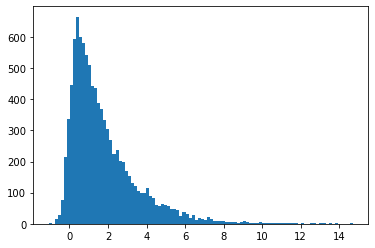

In [17]:
import scipy.stats as stats
size = 10000
tau_tau = 0.23 * units.pico
m_tau = 1.77 #GeV
e_tau = 0.5 * 91 # GeV
gamma = e_tau/m_tau
p_tau = np.sqrt(e_tau**2 - m_tau**2)
beta  = p_tau/e_tau
ts = stats.expon.rvs(scale = tau_tau, size = size)
ds = gamma * beta * ts * units.c * units.kilo
ds += 0.3 * stats.norm.rvs(size = size)
plt.hist(ds, 100);
print(np.mean(ds), ' mm')
xs = list(ds[ds<0])+list(-ds[ds<0])
print(np.std(xs))

### 1.2 ejercicio

Dibuja los diagramas de Feynman de las desintegraciones: $K^{*+} \to K^0 + \pi^+$, $n \to p + e + \bar{\nu}_e$, $\pi^+ \to \mu^+ + \nu_\mu$

[AB7.P1]

### 1.4 ejercicio

Escribe las corrientes cargadas de $\nu_\mu$ con protón y nucleón para producir un pión.

Existen las desintegraciones $\mu^+ \to e^+ + \gamma$, $\mu^+ \to e + e^+ + e^+$

[AB7.P8]

a1) $\nu_\mu + p \to \mu + p + \pi^+$,

a2) $\nu_\mu + n \to \mu + n + \pi^+$

b1) No es posible porque mo conserva el número leptónico de sabor. $L_\mu = -1, 0$ (antes y después). También $L_e = 0, 1$ (antes y después)

b2) No es posible porque no conserva el número leptónico de sabor. $L_\mu = -1, 0$ (antes y después). $L_e = 0, 1$ (antes y después)

### Ejercicio IceCube

IceCube es un gigantesco detector de neutrinos en la Antartida, construido con sondas instrumentalizadas de PMTs a una profundidad de 1.6 km de la superficie, donde el hielo es muy transparente, estudia las interacciones de neutirnos atmosféricos y cósmicos que interaccionan con el detector via ${\bar \nu}_\mu + p \to \mu^+ + n$. Considera un neutrino incidente con energía $E_a$ ultra-energético, del orden de TeV, calcula en momento del $\mu^+$, $p_\mu$, dependiendo de su ángulo de emisión $\theta$.

El 4 de diciembre del 2014, IceCube, detector "Big Bird" un $\mu^+$ de 2 PeV, ¿Cuál es la energía mínima del $\bar{\nu}_\mu$ que lo produjo? ¿Y su ángulo máximo respecto a la dirección del $\mu^+$?

[AL10.P7]

El cuadrimomento del anti-muón $p_c$ y del anti-neutrino $\bar{\nu_e}$ están relacionados por:

$$
p_c = \frac{E_a m_N}{ m_N + E_a (1-\cos \theta)} \left(1, 0, \sin \theta, \cos\theta \right)
$$

De donde despejamos:

$$
E_a = \frac{p_c}{1 - \frac{p}{m} (1-\cos \theta)}
$$

Para el caso $\theta = 0$, tenemos $E_a = p_c$

El ángulo máximo de emisión corresponderá con:

$
p (1-\cos \theta) = m,\;\;\; \theta = \sqrt{\frac{2m}{p}}
$


In [18]:
p = 2 * units.peta
m = 1 * units.giga
theta = np.sqrt(2*m/p)
print(' theta max {:e} degrees'.format(theta * 180/np.pi))

 theta max 5.729578e-02 degrees


## Mas problemas

*ejercicio*: Dibuja los diagramas de Feynman para los siguientes procesos:

  * $\tau \to \pi^- + \nu_\tau$, siendo $\pi^-$ la combinación de quarks ($d\bar{u}$)
  
  * $\pi^+ \to \mu^+ + \nu_\mu$.
  
  * $K^+ \to  \mu^+ + \nu_\mu$, siendo $K^+$ la combinación ($s\bar{u}$)


*ejercicio*: Dibuja los diagramas de Fynman para los sigientes procesos:

  * $\tau \to \mu + \bar{\nu}_\mu + \nu_\tau$
  
  * $\tau \to e + \bar{\nu}_e + \nu_\tau$
  
  * $\mu \to e + \bar{\nu}_e + \nu_\mu$

*ejercicio*: Considera $\pi^0$ una combinación $(u\bar{u})$ y dibuja e indica su relativa intensidad de las siguientes desintegraciones teniendo en cuenta en número de vértices:

  * $\pi^0 \to \gamma \gamma$
  
  * $\pi^0 \to \gamma + e + e^+$
  
  * $\pi^0 \to e + e^+$

*ejercicio*: Dibuja los diagramas árbol de las posible interacciones, e indica si son aniquilaciones o interacciones:
        
  * $e+e\to e+e$
  
  * $e+e^+ \to \mu + \mu^+$
  
  * $e + e^+ \to e + e^+$
  
  * $e + \nu_e \to e \nu_e$
  
  * $e + \bar{\nu}_e \to e + \bar{\nu}_e$

## 4 Detectors


### 4.1 ejercicio

Sea un $\pi^\pm$ y un $K^\pm$ con el mismo momento $p$ 4 GeV, evaluar la distancia $L$ que deben recorrer entre dos centelleadores cuya resolución temporal es $\sigma_t = 300$ ps, para que puedan distinguirse con la medida de su tiempo de vuelo en al menos dos descibaciones estándard.

[AB1.24]

## Otros

*ejercicio*: Demostrar que en un sistema de partículas con cuadrimomentos $p_i$, $i = 1, \dots, n$, la cantidad: 
$$
\left( \sum_i E_i \right)^2 - \left( \sum_i {\bf p}_i \right)^2
$$
es un invariante Lorentz

*ejercicio*: Demostrar que $\hat{P} \, u_+ (\theta, \phi) = v_-(\pi-\theta, \pi + \theta)$

### Bibliografía

* "Elementary Particle Physics", S. Bettini, Cambridge.

* "Modern Particle Physics", Mark Thomson, Cambridge.

* "Lepton and Quark", Francis Halzen, Alan D. Martin, Josh Wiley & Sons.

